# Compute  PCA : Method 1 : Clustering

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/28
- update : 2022/12/28

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.cluster import KMeans

In [4]:
from astropy.io import fits
import copy

In [5]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [6]:
hdu.info()

Filename: pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [7]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [8]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [9]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [10]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [11]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [12]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_76174/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

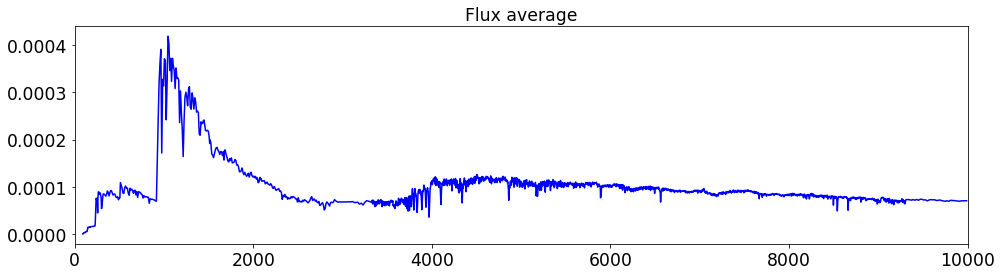

In [13]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

In [14]:
spec.shape

(550, 6361)

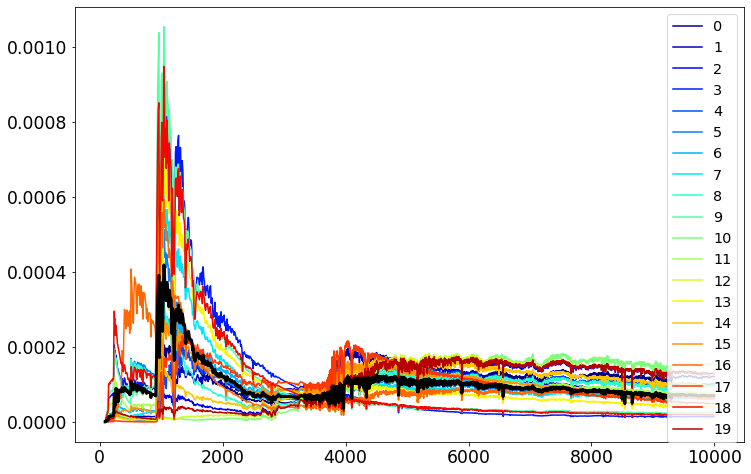

In [15]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering

## Clustering from PCA coefficients

In [16]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2)

In [17]:
X.shape

(550, 10)

In [18]:
km = KMeans(n_clusters=30)
#km = KMeans(n_clusters=3, verbose=1)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[-5.21064897e-03  1.76844416e-03 -1.02871694e-03 -3.10673537e-04
   1.95296097e-04 -7.69263773e-05  9.69665440e-05 -1.65845754e-05
  -2.32902579e-05 -1.24767489e-06]
 [ 3.02405977e-03 -4.46933529e-04 -8.63617579e-04  1.40692599e-04
  -1.45196578e-04  8.09014727e-05  8.32256298e-05  4.14863983e-05
   4.13211215e-05  1.78778822e-05]
 [ 5.67240133e-03  1.59582007e-03  9.59450120e-04 -2.71873765e-04
  -1.56856666e-04  1.71617823e-04  6.40319728e-05  1.59161927e-05
   3.13504975e-05  2.03858834e-05]
 [-2.20648276e-03 -1.47221441e-03  9.49338673e-04 -4.18412243e-06
   5.59181692e-05 -7.22285316e-06  3.11911124e-05 -5.36226134e-06
   2.43670915e-05 -3.18722281e-05]
 [-5.21324571e-04 -9.01906701e-04  1.84429003e-04 -7.68377330e-05
   1.94488525e-05  6.43306755e-06 -1.33498309e-05 -4.74407121e-06
   2.77329371e-05 -2.11464835e-05]
 [-5.13751398e-03  3.15322255e-04  1.72701981e-04  1.99515994e-04
  -1.72458344e-04  6.79147906e-05 -1.21458046e-04 -1.71880455e-05
   1.78347949e-06  4.

In [19]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
#my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [20]:
mydict

{0: array([ 10,  76,  84,  97, 101, 138, 156, 192, 201, 334, 335, 340, 341,
        342, 348, 349, 351, 384, 388, 495]),
 1: array([ 13,  23,  51, 112, 116, 139, 140, 141, 181, 207, 216, 226, 230,
        242, 245, 263, 276, 278, 359, 361, 374, 380, 416, 421, 459, 461,
        497, 517, 530]),
 2: array([ 64, 148, 159, 208, 222, 323, 363, 404, 414, 462]),
 3: array([  1,  41,  44,  56,  65,  93,  96, 154, 191, 199, 212, 235, 270,
        273, 277, 298, 377, 398, 403, 423, 474, 548]),
 4: array([  6,  15,  29,  47,  61,  67,  74, 119, 124, 130, 158, 160, 161,
        195, 202, 206, 243, 268, 300, 319, 415, 438, 443, 454, 460, 467,
        501, 509, 539, 540]),
 5: array([ 21,  57,  68,  78,  79,  86,  87,  90,  94, 105, 108, 133, 142,
        144, 224, 229, 246, 254, 284, 304, 324, 326, 360, 385, 393, 405,
        477, 484, 488, 496, 508, 546]),
 6: array([ 73,  91, 251, 318, 339, 352, 365, 400, 413, 457, 533]),
 7: array([104, 310, 343, 350, 441, 525]),
 8: array([ 48,  82, 238, 266, 2

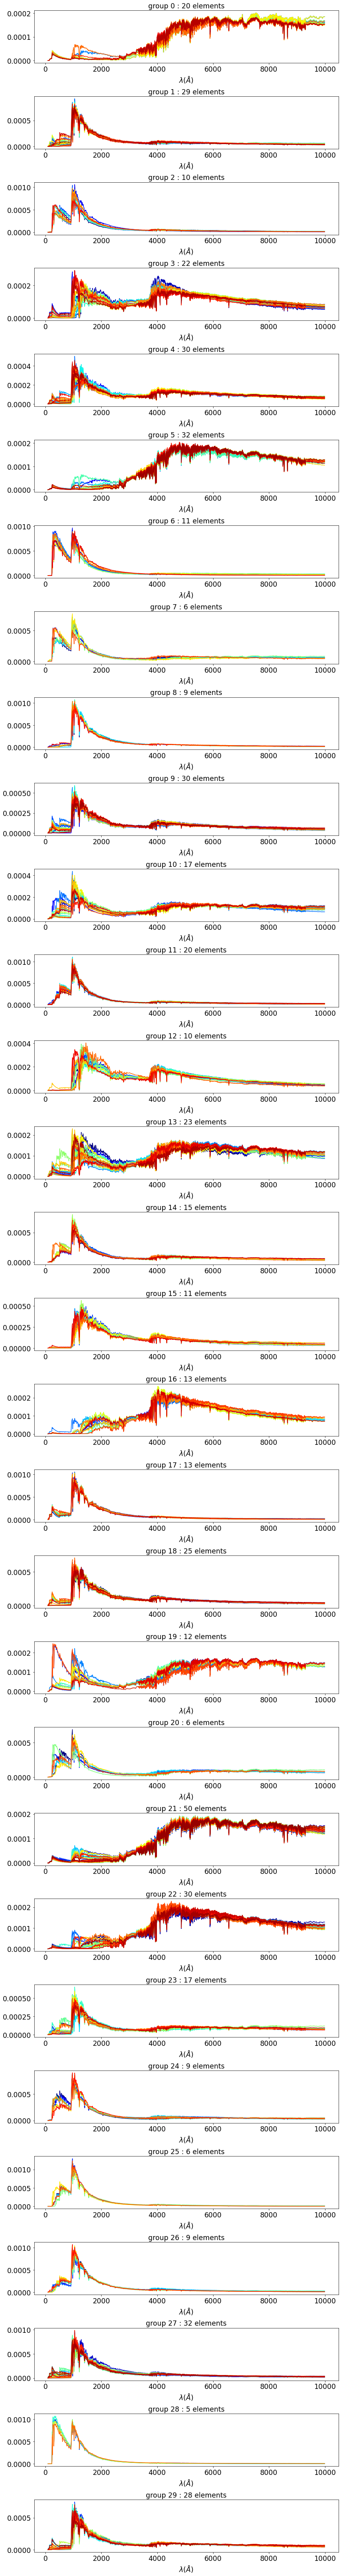

In [22]:
fig = plt.figure(figsize=(12, km.n_clusters*3))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=str(idx))
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
        
        
plt.tight_layout()
    
